In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import os, glob
from scipy.optimize import curve_fit
plt.style.use("ggplot")
cm = 1/2.54

In [2]:
t1F0 = pd.read_csv(\
'/home/nitta/Documents/sam/ACTIN-MYOSIN/2021/actinmyosin2/Analysis/Pull_Push/data/tip/TipXYF1.0t3S27.txt',\
names=['t','x','y'], delim_whitespace=True)

In [107]:
conff0 = glob.glob('data/Conformation_A001f0s**.txt')
conff0 = sorted(conff0)
conff1 = glob.glob('data/Conformation_A001f1s**.txt')
conff1 = sorted(conff1)

In [108]:
conff1

['data/Conformation_A001f1s27.txt',
 'data/Conformation_A001f1s28.txt',
 'data/Conformation_A001f1s29.txt',
 'data/Conformation_A001f1s30.txt']

In [175]:
beads = 13; 
#jmp = 5 
#jmp = 10
#jmp = 20
jmp = 30

conf0 = []; conf1 = []; xdiff0 = []; ydiff0 = []; xdiff1 = []; ydiff1 = []; bf0 = []; bf1 = []

for i in conff0:
    _ = pd.read_csv(i, names=['t','x','y','z'], delim_whitespace=True)
    _ = _[0::beads]
    _ = _[0::jmp]
    conf0.append(_)
    xdiff0.append(np.diff(_['x']))
    ydiff0.append(np.diff(_['y']))
    
for j in conff1:
    _ = pd.read_csv(j, names=['t','x','y','z'], delim_whitespace=True)
    _ = _[0::beads]
    _ = _[0::jmp]
    conf1.append(_)
    xdiff1.append(np.diff(_['x']))
    ydiff1.append(np.diff(_['y']))


$|b_1| = \sqrt{(x_2-x_1)^2 + (y_2-y_1)^2}$

$U_{b1} = \frac{1}{|b_1|} \times ((x_2-x_1), (y_2-y_1))$

In [176]:
ubx0 = []; uby0 = []
ubx1 = []; uby1 = []

for i in range(len(xdiff0)):
    b0 = np.sqrt(xdiff0[i]**2 + ydiff0[i]**2)
    ubx0.append(xdiff0[i]/b0)
    uby0.append(ydiff0[i]/b0)

for j in range(len(xdiff1)):
    b1 = np.sqrt(xdiff1[j]**2 + ydiff1[j]**2)
    ubx1.append(xdiff1[j]/b1)
    uby1.append(ydiff1[j]/b1)

In [177]:
ub0 = []; ub1 = []

for i in range(len(ubx0)):
    ub0.append(pd.DataFrame({'ubx':ubx0[i], 'uby':uby0[i]}))
    
for j in range(len(ubx1)):
    ub1.append(pd.DataFrame({'ubx':ubx1[j], 'uby':uby1[j]}))

for $\Delta s = 1$, calculate $<cos \Delta \theta(1)>$: <br>
mean of $Ub_1\cdot Ub_{1+1} + Ub_2\cdot Ub_{2+1} + Ub_3\cdot Ub_{3+1} + \cdots + Ub_{L-1}\cdot Ub_L$ <br>

for $\Delta s = 2$, calculate $<cos \Delta \theta(2)>$: <br>
mean of $Ub_1\cdot Ub_{1+2} + Ub_2\cdot Ub_{2+2} + Ub_3\cdot Ub_{3+2} + \cdots + Ub_{L-2}\cdot Ub_L$ <br>

Persistence length = plot(s,mean of Ubs)

In [178]:
_ = []; ds = []; dsm0 = []; s0 = []; c = 0; dsm_ = []; s_ = []

# try:
#     os.remove('ds_ub_status.txt')
# except:
#     print("'ds_ub_status.txt' does not exist.")
    
for h in range(len(ub0)):
    for i in range(len(ub0[h])-1):
#         print("Ds = %s"%i, file=open('ds_ub_status.txt','a'))
        for j in range(len(ub0[h])-1):
            try:
                _.append(np.dot(ub0[h].loc[j].values,ub0[h].loc[j+i].values))
#                 print("Ub%s.Ub%s"%(j,j+i), file=open('ds_ub_status.txt','a'))
            except:
                pass #print("No: Ub%s.Ub%s"%(j,j+i))
        #ds.append(_) # not necessary to save
        dsm_.append(np.mean(_))
        s_.append(c)
        _ = [] # empty this bucket
        c+=1
    s0.append(s_)
    dsm0.append(dsm_)
    c = 0; dsm_ = []; s_ = [] # reset stuff

s0 = np.array(s0)
dsm0 = np.array(dsm0)

In [179]:
_ = []; ds = []; dsm1 = []; s1 = []; c = 0; dsm_ = []; s_ = []

# try:
#     os.remove('ds_ub_status.txt')
# except:
#     print("'ds_ub_status.txt' does not exist.")
    
for h in range(len(ub1)):
    for i in range(len(ub1[h])-1):
#         print("Ds = %s"%i, file=open('ds_ub_status.txt','a'))
        for j in range(len(ub1[h])-1):
            try:
                _.append(np.dot(ub1[h].loc[j].values,ub1[h].loc[j+i].values))
#                 print("Ub%s.Ub%s"%(j,j+i), file=open('ds_ub_status.txt','a'))
            except:
                pass #print("No: Ub%s.Ub%s"%(j,j+i))
        #ds.append(_) # not necessary to save
        dsm_.append(np.mean(_))
        s_.append(c)
        _ = [] # empty this bucket
        c+=1
    s1.append(s_)
    dsm1.append(dsm_)
    c = 0; dsm_ = []; s_ = [] # reset stuff

s1 = np.array(s1)
dsm1 = np.array(dsm1)

In [169]:
# 50% of data
s50 = s # s[:-int(s.shape[0]*0.1)]
dsm50 = dsm # dsm[:-int(dsm.shape[0]*.1)] 

In [170]:
len(s1[0]) == len(s1[3]) == len(dsm1[2])

True

In [180]:
dfs0 = pd.DataFrame({'s00':s0[0], 's01':s0[1], 's02':s0[2], 's03':s0[3]})
dfdsm0 = pd.DataFrame({'dsm00':dsm0[0], 'dsm01':dsm0[1], 'dsm02':dsm0[2], 'dsm03':dsm0[3]})

s0_m = dfs0.mean(axis=1)
dsm0_m = dfdsm0.mean(axis=1)

dfs1 = pd.DataFrame({'s10':s1[0], 's11':s1[1], 's12':s0[2], 's13':s1[3]})
dfdsm1 = pd.DataFrame({'dsm10':dsm1[0], 'dsm11':dsm1[1], 'dsm12':dsm1[2], 'dsm13':dsm1[3]})

s1_m = dfs1.mean(axis=1)
dsm1_m = dfdsm1.mean(axis=1)

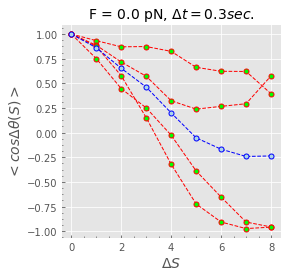

In [181]:
fig, ax = plt.subplots(1,1, figsize=(10*cm,10*cm))

for i in range(len(s0)):
    ax.plot(s0[i],dsm0[i], marker='o', markersize=5, c='r', ls='--', lw=1, markerfacecolor='lime')
ax.plot(s0_m,dsm0_m, marker='o', markersize=5, c='b', ls='--', lw=1, markerfacecolor='lightblue')
ax.minorticks_on()
ax.tick_params(which='both', direction='in')

ax.set_xlabel(r'$\Delta S$', fontsize=14)
ax.set_ylabel(r'$<cos \Delta \theta (S) >$', fontsize=14)
#ax.set_title('F = 0.0 pN, $\Delta t = 0.05 sec.$', fontsize=14)
#ax.set_title('F = 0.0 pN, $\Delta t = 0.1 sec.$', fontsize=14)
#ax.set_title('F = 0.0 pN, $\Delta t = 0.2 sec.$', fontsize=14)
ax.set_title('F = 0.0 pN, $\Delta t = 0.3 sec.$', fontsize=14)

#plt.savefig('fig/R1LpNoFitF0dt05.pdf', format='pdf', bbox_inches='tight')
#plt.savefig('fig/R1LpNoFitF0dt1.pdf', format='pdf', bbox_inches='tight')
#plt.savefig('fig/R1LpNoFitF0dt2.pdf', format='pdf', bbox_inches='tight')
#plt.savefig('fig/R1LpNoFitF0dt3.pdf', format='pdf', bbox_inches='tight')

plt.show()

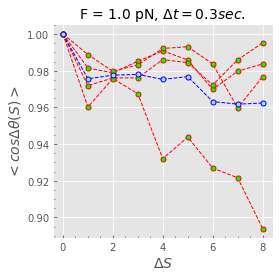

In [182]:
fig, ax = plt.subplots(1,1, figsize=(10*cm,10*cm))

for i in range(len(s1)):
    ax.plot(s1[i],dsm1[i], marker='o', markersize=5, c='r', ls='--', lw=1, markerfacecolor='lime')
ax.plot(s1_m,dsm1_m, marker='o', markersize=5, c='b', ls='--', lw=1, markerfacecolor='lightblue')
ax.minorticks_on()
ax.tick_params(which='both', direction='in')

ax.set_xlabel(r'$\Delta S$', fontsize=14)
ax.set_ylabel(r'$<cos \Delta \theta (S) >$', fontsize=14)
#ax.set_title('F = 1.0 pN, $\Delta t = 0.05 sec.$', fontsize=14)
#ax.set_title('F = 1.0 pN, $\Delta t = 0.1 sec.$', fontsize=14)
#ax.set_title('F = 1.0 pN, $\Delta t = 0.2 sec.$', fontsize=14)
ax.set_title('F = 1.0 pN, $\Delta t = 0.3 sec.$', fontsize=14)

#plt.savefig('fig/R1LpNoFitF1dt05.pdf', format='pdf', bbox_inches='tight')
#plt.savefig('fig/R1LpNoFitF1dt1.pdf', format='pdf', bbox_inches='tight')
#plt.savefig('fig/R1LpNoFitF1dt2.pdf', format='pdf', bbox_inches='tight')
plt.savefig('fig/R1LpNoFitF1dt3.pdf', format='pdf', bbox_inches='tight')

plt.show()

$<cos \Delta \theta> = exp(-\frac{s}{2Lp})$

In [72]:
def func(s50,Lp):
    return np.exp(-s50/(2*Lp))

popt, pcov = curve_fit(func, s50, dsm50)

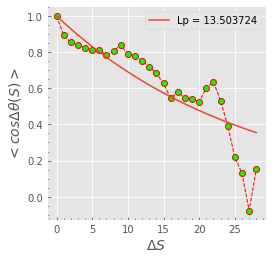

In [73]:
fig, ax = plt.subplots(1,1, figsize=(10*cm,10*cm))

ax.plot(s50,dsm50, marker='o', c='r', ls='--', lw=1, markerfacecolor='lime')
ax.plot(s50, func(s50,*popt), label='Lp = %s'%np.round(popt[0],6))

ax.minorticks_on()
ax.tick_params(which='both', direction='in')

ax.set_xlabel(r'$\Delta S$', fontsize=14)
ax.set_ylabel(r'$<cos \Delta \theta (S) >$', fontsize=14)
plt.legend()

#plt.savefig('fig/R1Lpx.pdf', format='pdf', bbox_inches='tight')
plt.show()